# Regresión lineal

Es un método de aprendizaje supervisado que sirve para **predecir el valor de datos futuros** (desconocidos) basándose en datos relacionados **conocidos**.

Su funcionamiento es relativamente sencillo y resulta bastante visual, como muestra el siguiente ejemplo:

Supongamos estos puntos en el espacio

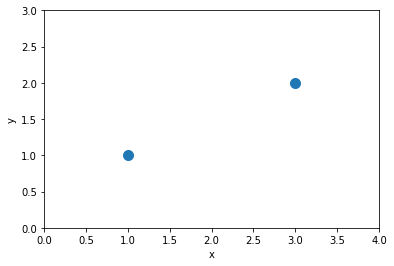

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 3])
y = np.array([1, 2])

plt.figure()

plt.xlim(0, 4)
plt.ylim(0, 3)

plt.xlabel('x')
plt.ylabel('y')

plt.scatter(x, y, s=100)

Recordemos la fórmula de una recta que pasa por dos puntos:
$$
\frac{x - x_{1}}{x_{2} - x_{1}} = \frac{y - y_{1}}{y_{2} - y_{1}}
$$
<br>
Entonces dados estos puntos, llamémoslos $p_1=(2,1)$ y $p_2=(3,2)$, la ecuación de la recta que pasa por ellos es la siguiente:


$$
\frac{x - 1}{3 - 1} = \frac{y - 1}{2 - 1}
$$


Lo que despejando deja:

$$
y = \frac{1}{2} \cdot x + \frac{1}{2} = 0.5 \cdot x + 0.5
$$

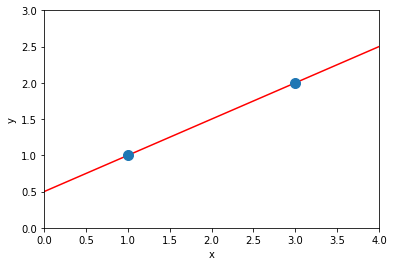

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

plt.xlim(0, 4)
plt.ylim(0, 3)

plt.xlabel('x')
plt.ylabel('y')

# points
x = np.array([1, 3])
y = np.array([1, 2])
plt.scatter(x, y, s=100, zorder=10)

# line
line = np.linspace(0, 4)
plt.plot(line, 0.5 * line + 0.5, c='red')

Esta recta se denomina **recta de regresión** y su funcionamiento consiste en averiguar un valor de $y$ para un $x$ conocido. Por ejemplo, podemos averiguar, para $x=2$, el valor de $y=0.5\cdot2+0.5=1.5$ (ver ecuación anterior).<br><br>
Es sencillo estimar los valores, pero la parte costosa del proceso consiste en trazar la recta determinando qué puntos debe atravesar. El objetivo del entrenamiento del modelo consiste en trazar esta recta. Para ello, se deben estimar parámetros de la ecuación de la recta, recordemos su forma:

$$
y = m \cdot x + n
$$

En problemas "reales", los datos tendrán una dimensión mucho mayor, y será necesario tratar con cantidades de puntos(filas del conjunto datos) y atributos (columnas) muy grandes. Nuestros modelos de regresión *aprenden* o *trazan la recta* a partir de estos puntos(datos). <br><br>



Vamos a cargar unos datos para poner un ejemplo con varias características:

In [3]:
import pandas as pd
url = 'https://gist.githubusercontent.com/w-dan/a919c633106f915d017e0fff74a8f9ed/raw/4899555d2615ef7a704e7e77017cd7658cb3fb34/possum-example.csv'
possum_df = pd.read_csv(url)
possum_df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


Este conjunto de datos contiene información sobre unas cuantas zarigüeyas, buscamos predecir su edad en base a algunas medidas como la longitud de la cola, de sus patas, las orejas, el sexo, etc.

Pero... ¿cómo podemos tratar dimensiones tan grandes si los puntos únicamente tienen valores $x$ e $y$? Es necesario plantearlo como sistemas de ecuaciones:

$$
Y = \beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2 + \cdots + \beta_m \cdot X_m + \epsilon
$$

Donde:

- $\beta_0$ se corresponde con el *bias* de la recta.
- $\beta_1, \dots, \beta_m$ son los parámetros de la pendiente de la recta en las diferentes dimensiones
- $\epsilon$ representa el error que cometemos al no poder aproximar perfectamente todos los puntos. Nótese que cuando tenemos más de 2 puntos es prácticamente imposible encontrar una **recta** que pase por todos ellos.

Siendo:

\begin{equation}
Y = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}
\end{equation} 

La matriz que contiene los valores de la variable objetivo (la variable que queremos predecir, en este caso, la edad) para la *n* muestras del conjunto de datos.


In [4]:
y = pd.DataFrame(possum_df['age'])
X = possum_df.drop(['age'], axis=1)
y

,age
0,8.0
1,6.0
2,6.0
3,6.0
4,2.0
...,...
99,1.0
100,1.0
101,6.0
102,4.0



\begin{equation}
X = \begin{pmatrix} 1 & x_{1,1} & \cdots & x_{1,m} \\ 1 & x_{2,1} & \cdots & x_{2,m} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n,1} & \cdots & x_{n,m} \end{pmatrix}
\end{equation}

La matriz que contiene los valores de las *m* carácterísticas ($x_{i,j}$) del conjunto de datos.
Es decir, todas las características de nuestras zarigüeyas, exceptuando su edad (variable objetivo, o variable que queremos predecir).

In [5]:
X

,case,site,Pop,sex,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0



\begin{equation}
\beta = \begin{pmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_m \end{pmatrix}
\end{equation}

La matriz de coeficientes del modelo de regresión **que se van a aprender**.

\begin{equation}
\epsilon = \begin{pmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_n \end{pmatrix}
\end{equation}

La ecuación del producto se simplifica en:
$$
\beta = \left[ \left( X^t X \right)^{-1} X^t \right] Y
$$

¿Qué tipo de valores diríais que se le pueden pasar a una regresión lineal? ¿Admitirá datos categóricos?

## Ejemplos

Volvamos a un ejemplo más simple para ver la ecuación en funcionamiento:

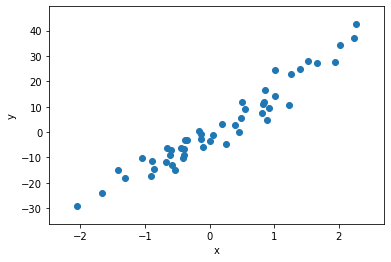

In [6]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

X, y = make_regression(n_samples=50, n_features=1, n_informative=1, n_targets=1, noise=5, random_state=43)

plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x')
plt.ylabel('y')

plt.scatter(X[:,0], y)

Dados estos puntos, podemos emplear la ecuación para trazar una recta a través de ellos, calculamos $\beta$:

In [7]:
n,m = X.shape
x0 = np.ones((n,1))
stack = np.hstack((x0, X))

# beta = ((X^t * X)^-1 * X^t) * y
beta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(stack), stack)), np.transpose(stack)), y)
beta

array([-0.12197581, 15.45017385])

Y según la ecuación $$
\hat{y} = \beta_0 + \beta_1 \cdot x_1
$$ obtenemos:

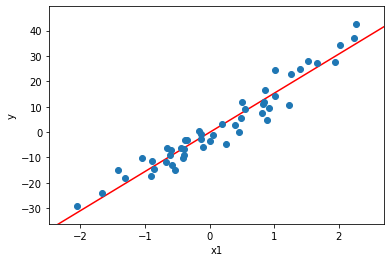

In [8]:
plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x1')
plt.ylabel('y')

plt.scatter(X[:,0], y, zorder=10)

line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.plot(line, beta[0] + beta[1] * line, c='red')

Por suerte, podemos ahorrarnos todas estas líneas de código gracias al modelo `linear_model.LinearRegression` de `sklearn`:

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

## Ejemplo real e interpretación

Volvemos al dataset de las zarigüeyas

In [10]:
possum_df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


Guardamos por separado la variable objetivo y guardamos las variables independientes numéricas (aquí faltan los pasos de análisis y preprocesamiento de los datos, pero vamos a omitirlos por simplicidad).

In [11]:
y = pd.DataFrame(possum_df['age'])                                    # guardamos la variable objetivo por separado
X = possum_df.drop(['age', 'case', 'site', 'Pop', 'sex'], axis=1)     # sacamos de aquí la variable objetivo, y además algunos atributos no numéricos
X

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...
99,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


## Qué hacer si faltan datos (datos nulos)

Ahora vamos a entrenar la regresión lineal con el método `fit`:

In [13]:
reg = LinearRegression().fit(X, y)

ValueError: ignored

Curioso... ¿Faltan datos? Vamos a comprobarlo

In [14]:
X.isnull().sum()

hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

¡Efectivamente! Nos han colado datos sucios... <br>
Podemos usar los métodos isnull().sum() para contar la suma de valores nulos de cada columna del dataset. Podemos ver que la columna problemática es *footlgth*. ¿Pasará lo mismo con la variable objetivo?

In [15]:
y.isnull().sum()

age    2
dtype: int64

¡Pues también! Menudo descuido. En estas circunstancias tenemos dos opciones:


1.   Eliminar la fila con el dato nulo
2.   Rellenarlo con un valor dentro de la media, con el método `fillna`

En casos con datasets pequeños, con pocas filas, es recomendable usar la opción 2., pero en datasets grandes, cualquiera puede valer, siendo la 1., obviamente, la opción más sencilla.


In [16]:
print("Numero de filas: ", len(X))

Numero de filas:  104


Como tenemos pocas filas, vamos a tener que optar por la opción 2.

In [17]:
X['footlgth'] = X['footlgth'].fillna(X.footlgth.mean())
X.footlgth.isnull().sum()

0

In [18]:
y['age'] = y['age'].fillna(y.age.mean())
y.age.isnull().sum()

0

Arreglado, podemos seguir.

## Ahora sí, la regresión

In [19]:
reg = LinearRegression().fit(X, y)

In [20]:
print(reg.intercept_)

[-12.25087866]


Podemos extraer los coeficientes para cada atributo (vamos a vincularlos a los nombres en un dataframe en favor de la legibilidad)

In [21]:
reg.coef_

array([[ 0.03266798,  0.02386972, -0.00651923,  0.01968358, -0.06428416,
         0.06918913,  0.28017065,  0.14997488,  0.13338143]])

In [22]:
data = np.array([[ 0.03266798, 0.02386972, -0.00651923, 0.01968358, -0.06428416, 0.06918913, 0.28017065, 0.14997488, 0.13338143]])
columns = ['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']

df = pd.DataFrame(data, columns=columns)

df

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,0.032668,0.02387,-0.006519,0.019684,-0.064284,0.069189,0.280171,0.149975,0.133381


Como norma general:

Los valores positivos representan una correlación directa (si el valor sube, también lo hace el de la variable objetivo) y los negativos, inversa.

La magnitud de los coeficientes miden el grado de aportación, positiva o negativa, de una determinada característica al precio de la vivienda.

Por ejemplo, la edad de una zarigüeya aumenta en 0.03 años por cada centímetro que aumenta la longitud de sus patas traseras *hdlngth*.

## Problemas de la regresión lineal
### Overfitting

Se da cuando el modelo no generaliza de forma correcta con datos nuevos (distintos al conjunto de entrenamiento) porque el modelo está sobreespecializado con los datos de entrenamiento.<br>
Esto significa que cuando se encuentre datos atípicos (outlier) el modelo se desviará en exceso hacia ellos.


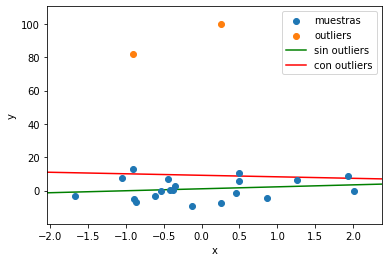

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

# conjunto de datos
n_samples = 20
n_outlayers = 2

X, y = make_regression(n_samples=n_samples, n_features=1, n_informative=1, n_targets=1, noise=5, random_state=43)

X_outlayers, y_outlayers = make_regression(n_samples=n_outlayers, n_features=1, n_informative=1, n_targets=1, noise=5, bias=100, random_state=43)

X = np.vstack((X, X_outlayers))
y = np.hstack((y, y_outlayers))

# configuración del gráfico
plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x')
plt.ylabel('y')

# muestras
plt.scatter(X[:n_samples,0], y[:n_samples], zorder=10, label="muestras")
plt.scatter(X[n_samples:,0], y[n_samples:], zorder=10, label="outliers")

# regresion sin outlayers
reg = LinearRegression().fit(X[:n_samples,:], y[:n_samples])
line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.plot(line, reg.intercept_ + reg.coef_[0] * line, c='green', label="sin outliers")

# regresion con outlayers
reg_outlayers = LinearRegression().fit(X, y)
line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.plot(line, reg_outlayers.intercept_ + reg_outlayers.coef_[0] * line, c='red', label="con outliers")

# mostrar el gráfico
plt.legend()
plt.show()

### Coste computacional
Como hemos visto, hay que realizar varios productos de matrices y varias traspuestas, operaciones increíblemente costosas a gran escala (complejidad exponencial)

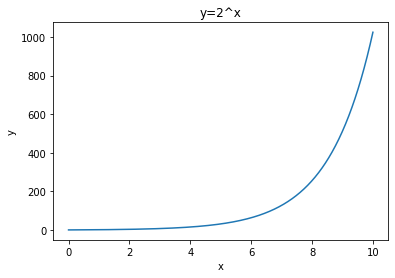

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Creamos un array de valores para x
x = np.linspace(0, 10, 1000)

# Calculamos los valores de y para cada valor de x
y = 2**x

# Creamos una figura y un eje
fig, ax = plt.subplots()

# Graficamos la recta y=x^2
ax.plot(x, y)

# Añadimos etiquetas a los ejes y un título
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('y=2^x')

# Mostramos el gráfico
plt.show()


### Es... Bueno, lineal

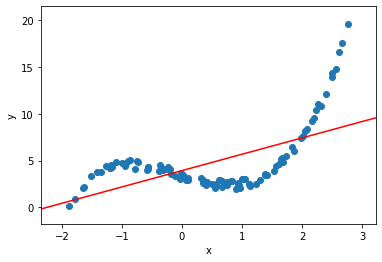

In [26]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

n_samples = 100

np.random.seed(43)

X = np.expand_dims(np.linspace(-2, 2, n_samples), axis=1) + np.random.rand(n_samples,1)
y = 3 - 2 * X + X * X * X + np.random.rand(n_samples,1)

# configuración del gráfico
plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x')
plt.ylabel('y')

plt.scatter(X, y)

reg = LinearRegression().fit(X, y)
line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.plot(line, reg.intercept_ + reg.coef_[0] * line, c='red')

plt.show()